# **Htet Wai Aung**

**The Sparks Foundation: Computer Vision & Internet of Things Internship**

Task2 : Color Identification in Images

Description : Implementing an image color detector that identifies all the colors in an image

**Importing Necessary Libraries**

In [1]:
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Connecting with Google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading sample image**

The image type is <class 'numpy.ndarray'>
The shape of image is (3456, 4608, 3)


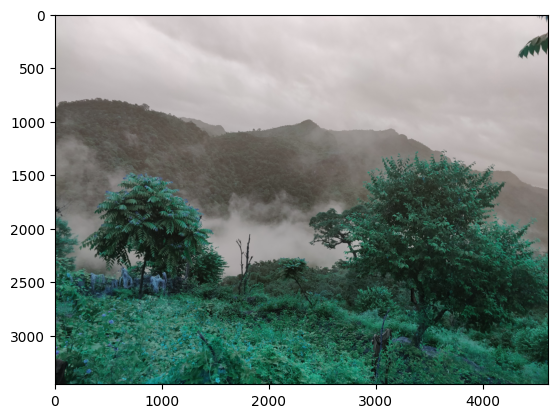

In [4]:
# Reading an image with opencv and showing its size and type

img = cv2.imread('/content/drive/MyDrive/The Sparks Foundation/images/sample_image.jpg')
print('The image type is {}'.format(type(img)))
print('The shape of image is {}'.format(img.shape))
plt.imshow(img)
#plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

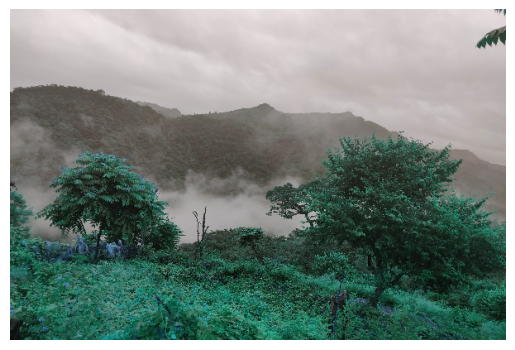

In [5]:
# Resizing the image

img = cv2.resize(img, (600, 400))
plt.imshow(img)
plt.axis('off')

Text(0.5, 1.0, 'RGB Image')

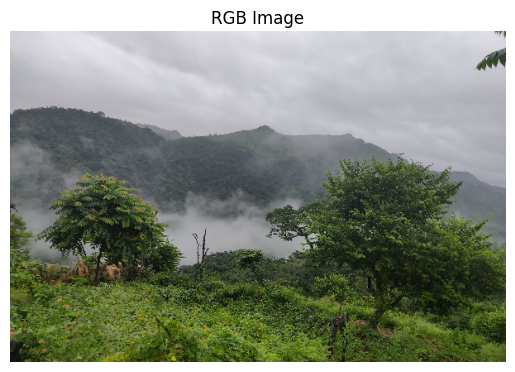

In [6]:
# Converting the image into RGB

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.title('RGB Image')

Text(0.5, 1.0, 'Gray Image')

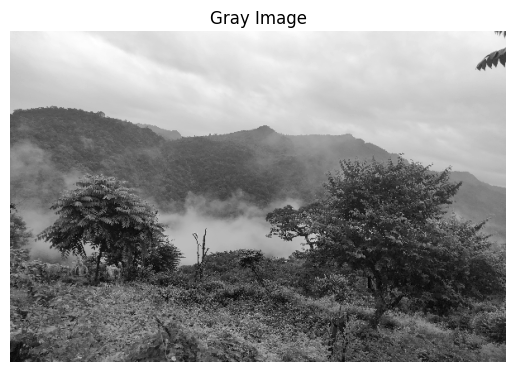

In [7]:
# Converting into gray color

img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap = 'gray')
plt.axis('off')
plt.title('Gray Image')

**Defining Functions for Color Identification**

In [8]:
# Image reading and converting BGR to RGB

def get_img(img_path):
  image = cv2.imread(img_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

In [9]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [10]:
# Getting colors of image

def get_colors(image, number_of_colors, show_chart):
    
    new_img = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    new_img = new_img.reshape(new_img.shape[0] * new_img.shape[1], 3)

    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(new_img)
    # print('labels', labels)

    # sorting the color in correct percentage
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    # print('counts', counts)
    
    center_colors = clf.cluster_centers_
    # print(center_colors)
    # Getting colors orderly by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([206.76034888, 206.45446035, 213.92752928]),
 array([77.95876253, 95.5827202 , 38.4962161 ]),
 array([121.14754169, 125.71865549, 125.42581872]),
 array([54.30534534, 67.07017439, 33.97726661]),
 array([30.13758114, 38.55539805, 21.12359173]),
 array([179.74065875, 180.31452194, 186.76236832]),
 array([109.34694   , 125.00466173,  56.05420751]),
 array([84.17200759, 91.01600612, 92.29556421])]

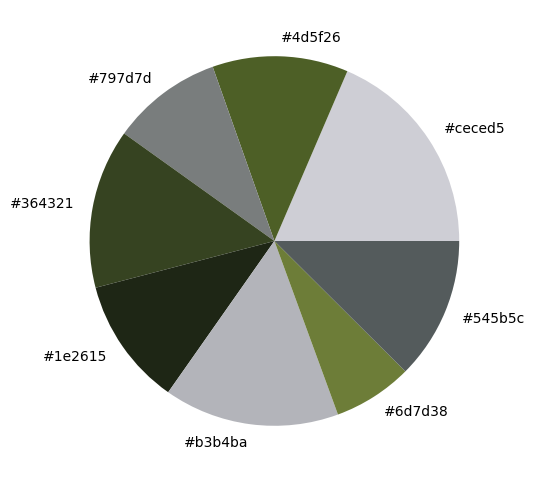

In [11]:
get_colors(get_img('/content/drive/MyDrive/The Sparks Foundation/images/sample_image.jpg'), 8, True)

**Image Searching by Using Colors**

In [12]:
# Getting images from the directory

IMAGE_DIRECTORY = '/content/drive/MyDrive/The Sparks Foundation/images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_img(os.path.join(IMAGE_DIRECTORY, file)))

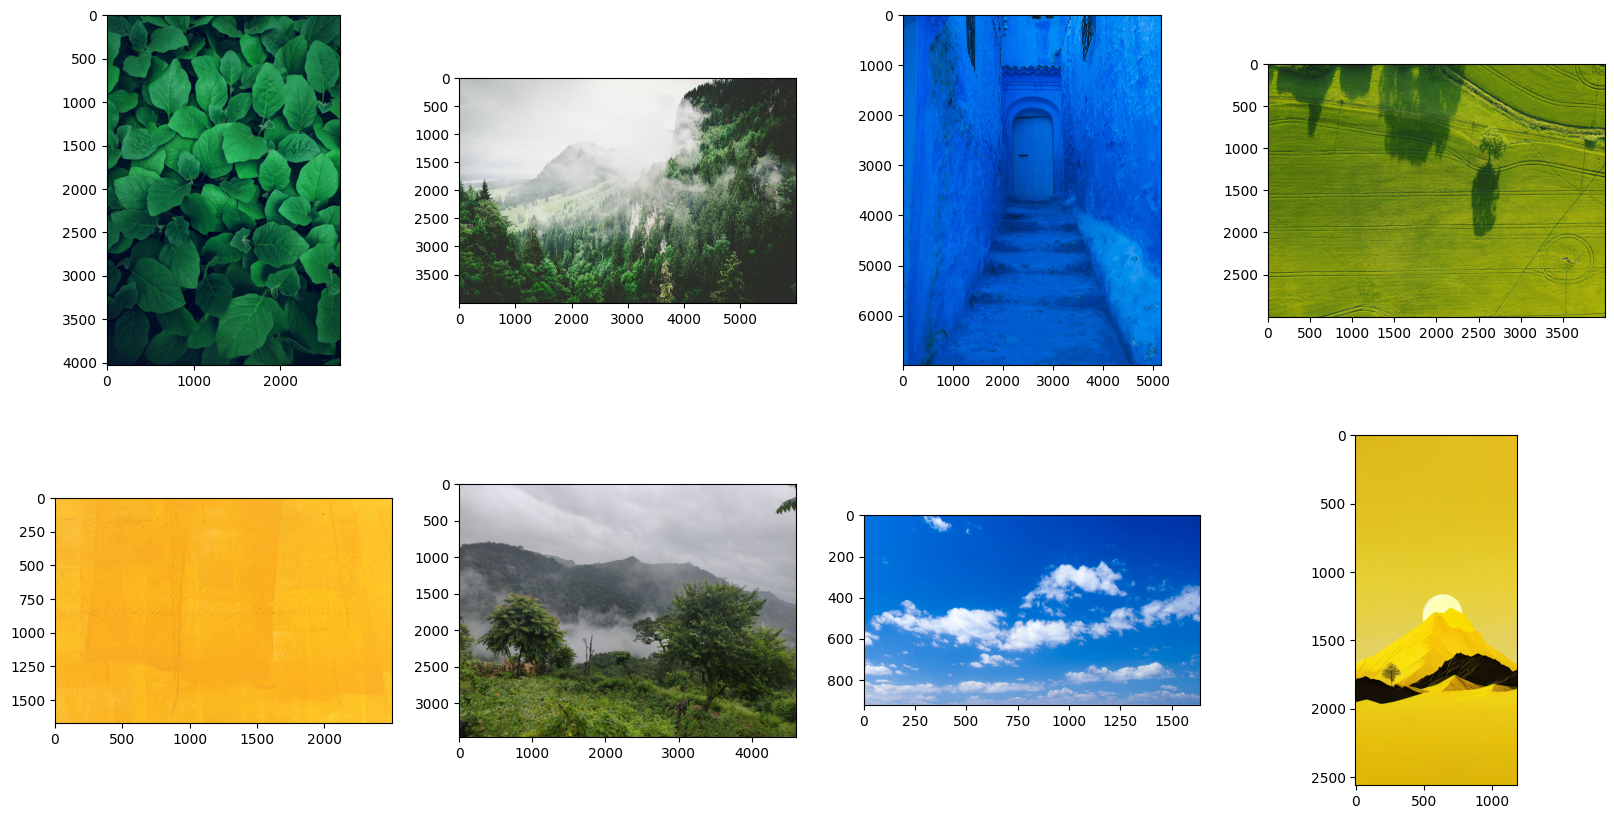

In [13]:
# Plotting images

fig = plt.figure(figsize=(20, 10))
rows = 2
cols = 4
for i in range(len(images)):
  fig.add_subplot(rows, cols, i+1)
  plt.imshow(images[i])

**Calculating color matching**

In [14]:
def match_image_by_color(image, color, threshold = 50, number_of_colors = 8): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [15]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 6, index)
            plt.imshow(images[i])
            index += 1

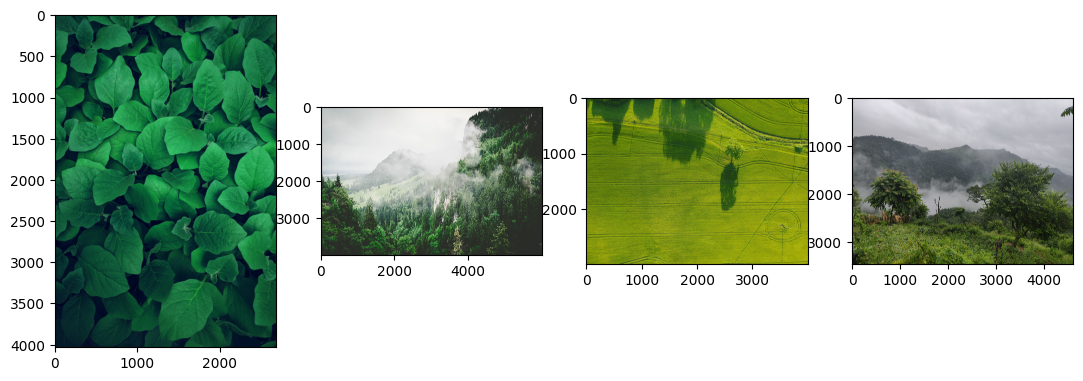

In [16]:
# Searching for GREEN images

plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 50, 5)

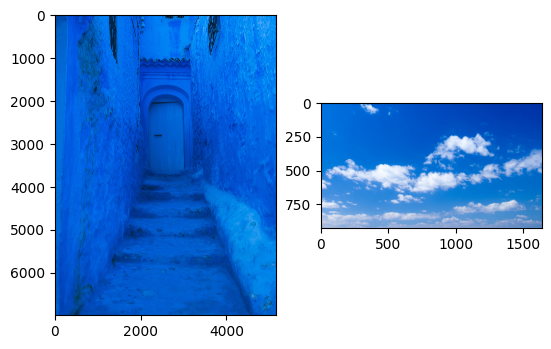

In [17]:
# Searching for BLUE images

plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 50, 5)

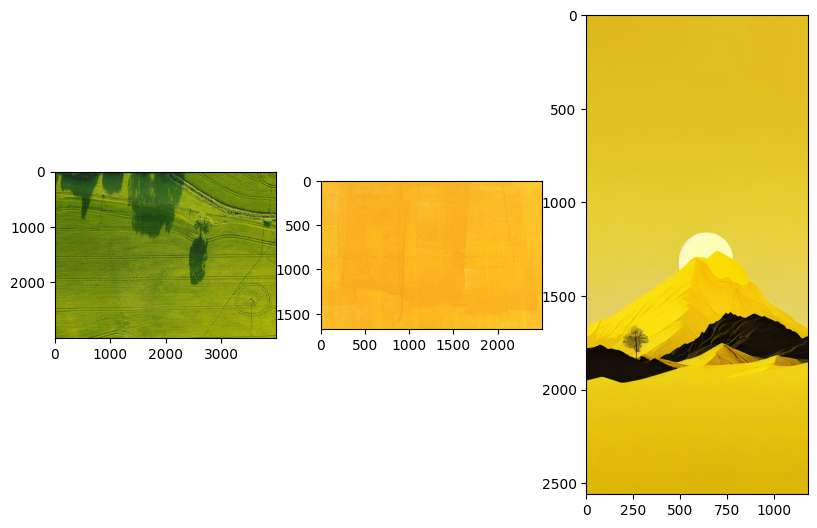

In [18]:
# Searching for YELLOW images

plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 50, 5)